# **Proyecto: Analisis y visualizacion de datos con Python**
---

# **Integrantes:**
- Alejandro Rangel Retavisca, jarangelr@unal.edu.co
- Eder Fabian Ruiz, edruiza@unal.edu.co 

# **Entendimiento del Negocio**
---



## **1. Marco del Proyecto**
---

En el marco de este proyecto se utiliza un dataset de medidas realizados por un sistema de penetracion terrestre (GPR por sus siglas en ingles) ubicado en el campus de la Universidad Nacional de Colombia sede Bogota. Las medidas tomadas por este dispositivo corresponden a una serie de elementos canonicos enterrados (cilindros) de diferentes materiales y diferentes dimensiones. El proposito de este dataset de elementos canonicos es determinar la capacidad del sistema GPR en detectar elementos con diferentes permitividades.

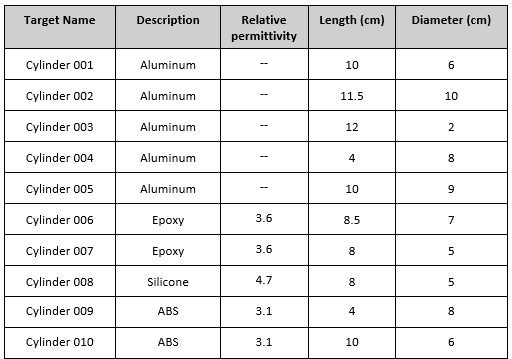

Tabla 1. Elementos Canonicos

Las medidas se realizan desplazando el dispositivo GPR junto con los sensores (antenas) en un sistema de posicionamiento a una velocidad de 1 cm/s sobre el elemento canónico enterrado, obteniendo 500 IRF (Impulse Respond Function) impulsos de respuesta de la zona medida. Esta quiere decir que cada elemento medido cuenta con 500 IRF o A-scan.

Es importante resaltar que el elemento bajo estudio se encuentra enterrado en la mitad exacta del recorrido realizado por el posicionador. Esto quiere decir, que el posicionador realiza un barrido de 50 cm y el centro geométrico del elemento se encuentra a 25 cm. Todos los elementos se encuentran a una profundidad de 5 cm.


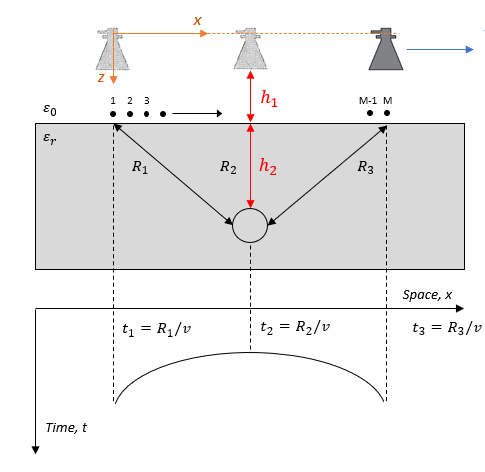

Figura 1. Configuración de medición GPR B-scan y aliasing hiperbólico espacio-temporal resultante 

Como es conocido la exploración con tegnologias GPR busca describir a traves de imagenes lo que se encuentra bajo la superficie en estudio. Por esta razón, es necesario tomar esos 500 IRF de cada elemento medido para formar una imagen llamada B-scan, que no es mas que la descripción de la firma hiperbolica producida por las ondas electromagneticas al hacer contacto con el elemento de interes que se encuentra bajo la superficie asi como se ilustra en la figura 1.

 

### **1.1. Objetivo del Negocio**
---

El proposito de las medidas realizadas para construir este dataset con elementos canonicos es determinar la capacidad del sistema GPR (ver figura 2) en detectar elementos con diferentes permitividades y dimensiones.


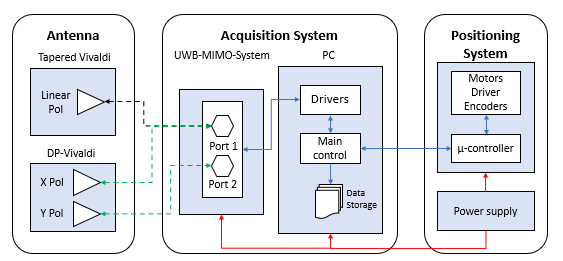

Figura 2. Sistema GPR

El sistema de adquisición cuenta con 4 cabezas de radar, cada cabeza tiene un puerto de transmisión y dos de recepción.  

Este proyecto tiene como proposito determinar el comportamiento de los A-scan de cada uno de los elementos canonicos en funcion de su permitividad. Para ello es necesario entender el comportamiento de los datos usando como herramienta el análisis estadístico. 

Valoración actual: el sistema de adquisición entrega cada medida (500 IRF) de un elemento en un archivo *.mat que requiere de un tratamiento para poder extraer los datos brutos que se pretenden analizar, ya que dicho archivo también contiene información que consideraremos como metadatos. 






### **1.2. Metas**
---

- Extraer la información de interés del archivo UWBdata.mat creado por el sistema de adquisición.

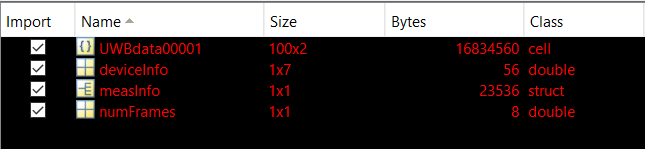

Figura 3. Archivo *.mat

La información de interés se encuentra en UWBdata0001, el restante de la información es considerada como metadata.

- Realizar un análisis de los datos a través de estadística descriptiva, correlaciones, etc., para así modelar ya sean las diferencias o relaciones que se presentan entre los datos obtenidos para cada elemento canónico (tabla 1). Con este análisis se busca  determinar el comportamiento de los A-san de cada uno de los elementos en función de su permitividad.  

- Realizar una visualización del análisis estadístico sobre los A-scan y presentar la imagen obtenida por el agrupamiento de los A-scan como un radar-grama o B-scan como se conoce en la literatura.




### **1.3. Plan**
---

A continuación, se describe la planeación del proyecto:

- Selección de los datos (entendimiento del negocio): ya que el dataset es construido con diferentes configuraciones experimentales, para este proyecto se elige el arreglo mono-estatico (figura 4), en esta configuración se dispone tan solo de una antena la cual transmite la onda electromagnética y también recibe la onda retro-dispersada por el elemento canónico bajo estudio y el suelo.  

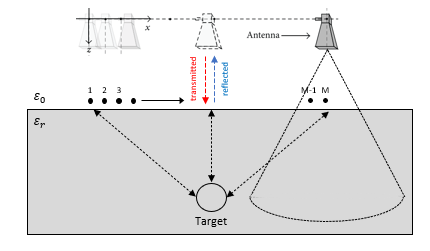

Figura 4. Arreglo mono-estatico.

- Carga de datos (entendimiento de los datos): Posterior a la selección de datos se cargan los archivos UWBdata.mat de cada elemento considerado en la tabla 1.
-  Extracción de información (Preparación de los datos): ya que los archivos UWBdata.mat contienen información adicional, el propósito es extraer la información que contiene los 500 IRF o A-sacan en un arreglo de cada elemento canónico.
- Preparación de los datos: de la información que contiene estos 500 IRF tan solo se tomara la información del suelo y del elemento. Esto quiere decir que la información del suelo se puede obtener de los primeros IRF del arreglo  y del elemento de los IRF de la mitad del arreglo. 

-	Análisis de datos: Realizar un análisis de los datos a través de estadística descriptiva, correlaciones, etc., para así modelar ya sean las diferencias o relaciones que se presentan entre los datos obtenidos para cada elemento canónico.

- Visualización: Realizar una visualización del análisis estadístico sobre los A-scan. 


## **2. Entendimiento de los datos**
---

En esta etapa de realiza la adquisición e integración de los datos que se encuentran en los archivos UWBdata.mat para cada elemento considerado en la tabla 1. Además, se hace una análisis exploratorio de los datos utilizando estadística descriptiva y sus visualizaciones correspondientes.

In [ ]:
from ctypes import c_uint16
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import h5py
import scipy.io
import matplotlib.pyplot as plt

Mounted at /content/drive


Se genera una función para adquirir los datos de interés del archivo UWBdata.mat a un tensor con la siguiente estructura (Channel,Frames,Samples)

Channel = 8, es el numero de canales del sistema de adquisición.

Frames = 500, es el numero de IRF por elemento canónico.

Samples = 511, es el numero de muestras que contiene cada IRF.

Esto se hace como parte de la preparación de los datos.

In [ ]:
def ReadDataRead(rute):
  
  f = scipy.io.loadmat(rute)
  f.keys() # ver las bibliotecas del archivo
  frames=f['numFrames'] # guarda el numero de Frames
  A=f['UWBdata00001'] # Esta contenido todos los datos del radar
  B=np.zeros((8,500,511)) # define Sensor 
  B1=A[0][1] # En este espacio estan los IRF [max100]
  j=5 # canal 
  for j in range(8):
    for k in range(int(frames/100)): # Ciclo para extraer los 100 datos de cada espacio en k  
      B1=A[k][1]
      for i in range(100): 
        B[j][i+k*100]=[A3[i][j] for A3 in B1] # Extrae los datos del canal y numero de frames
  
  return B
  

Carga de los archivos UWBdata.mat de cada uno de los cilindros

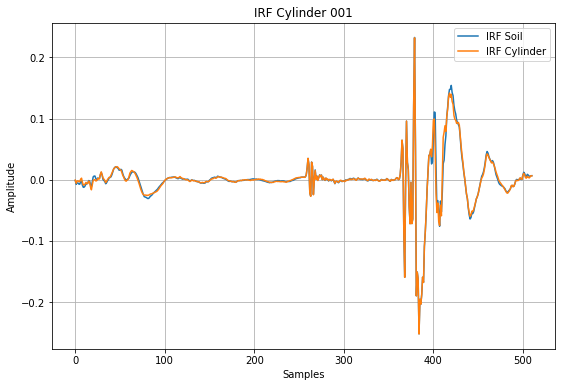

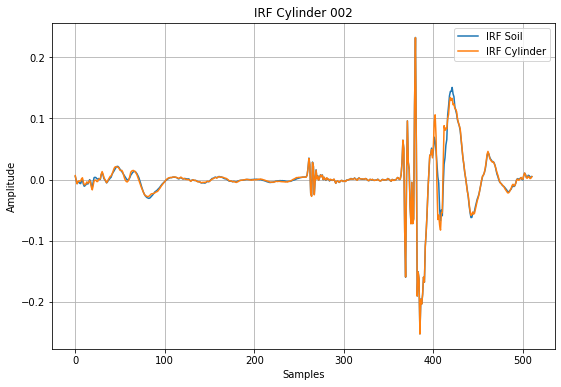

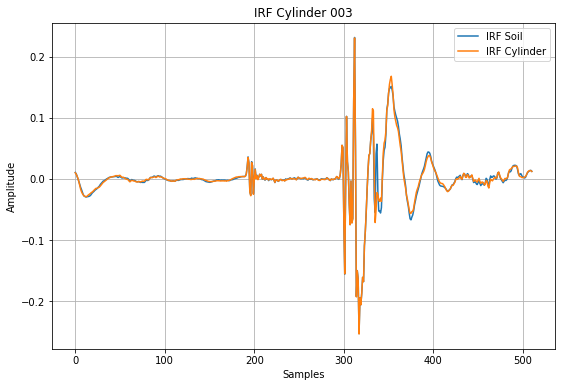

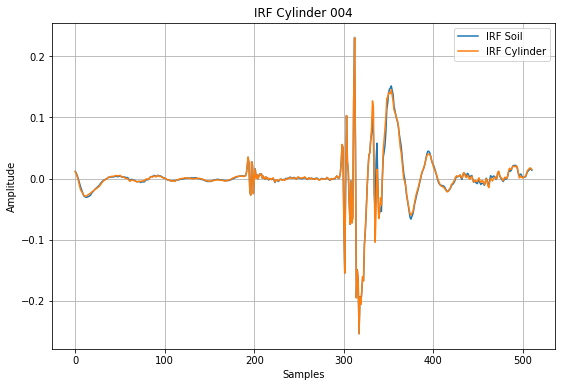

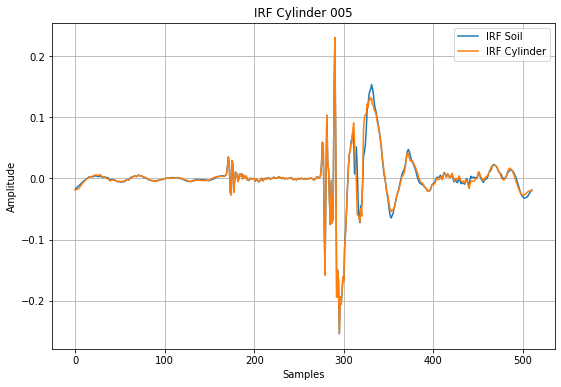

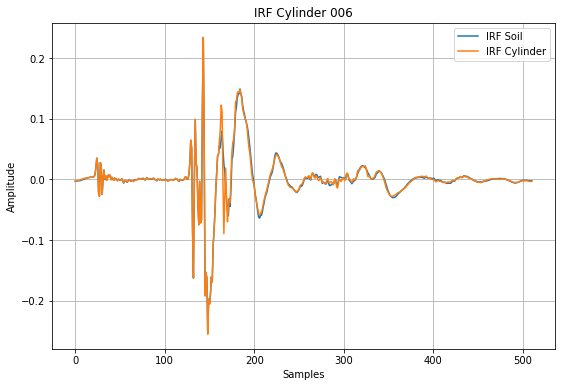

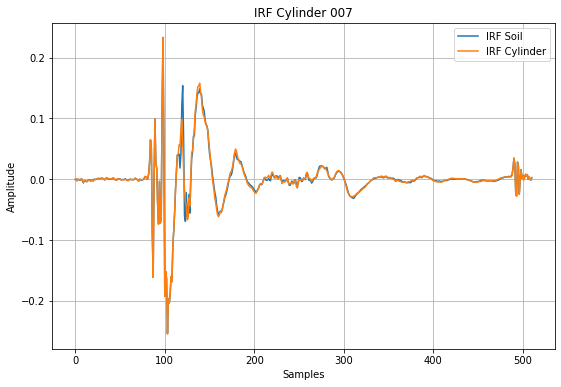

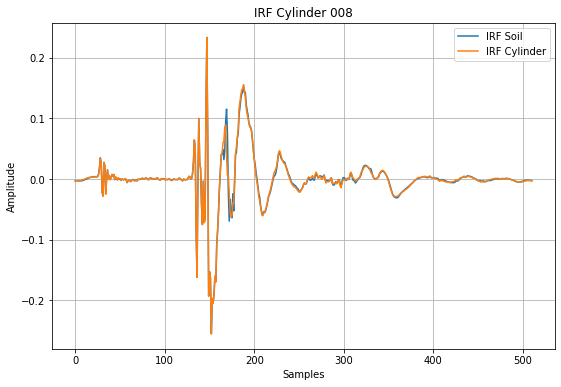

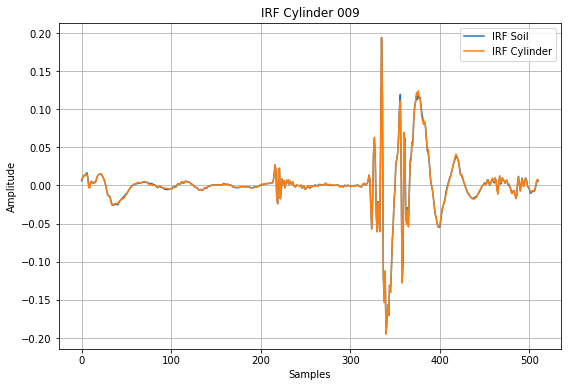

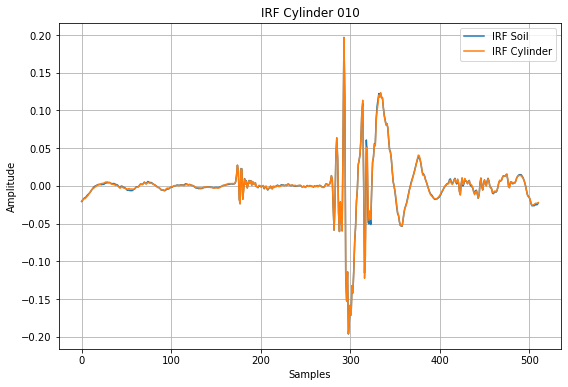

In [169]:
# Carga de archivos UWBdata.mat
C1_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_001/Cylinder_001_TSA800/Cylinder_001_P1_H1_TSA800/UWBdata.mat' # cilindro 1 - Aluminio
CYL_1 = ReadDataRead(C1_rute)
C2_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_002/Cylinder_002_TSA800/Cylinder_002_P1_H1_TSA800/UWBdata.mat' # cilindro 2 - Aluminio
CYL_2 = ReadDataRead(C2_rute)
C3_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_003/Cylinder_003_TSA800/Cylinder_003_P1_H1_TSA800/UWBdata.mat' # cilindro 3 - Aluminio
CYL_3 = ReadDataRead(C3_rute)
C4_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_004/Cylinder_004_TSA800/Cylinder_004_P1_H1_TSA800/UWBdata.mat' # cilindro 4 - Aluminio
CYL_4 = ReadDataRead(C4_rute)
C5_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_005/Cylinder_005_TSA800/Cylinder_005_P1_H1_TSA800/UWBdata.mat' # cilindro 5 - Aluminio
CYL_5 = ReadDataRead(C5_rute)
C6_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_006/Cylinder_006_TSA800/Cylinder_006_P1_H1_TSA800/UWBdata.mat' # cilindro 6 - Epoxy
CYL_6 = ReadDataRead(C6_rute)
C7_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_007/Cylinder_007_TSA800/Cylinder_007_P1_H1_TSA800/UWBdata.mat' # cilindro 7 - Epoxy
CYL_7 = ReadDataRead(C7_rute)
C8_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_008/Cylinder_008_TSA800/Cylinder_008_P1_H1_TSA800/UWBdata.mat' # cilindro 8 - Silicona
CYL_8 = ReadDataRead(C8_rute)
C9_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_009/Cylinder_009_TSA800/Cylinder_009_P1_H1_TSA800/UWBdata.mat' # cilindro 9 - ABS
CYL_9 = ReadDataRead(C9_rute)
C10_rute ='/content/drive/Shareddrives/TII UNAL GPR/Data Set Measurements/Monostatic Setup 1/Sample 1/Cylinder_010/Cylinder_010_TSA800/Cylinder_010_P1_H1_TSA800/UWBdata.mat'# cilindro 10 - ABS
CYL_10 = ReadDataRead(C10_rute)

# asignación de la información del canal # 5 que pertenece a la cabeza 3 de radar, asi el tensor (channels,frames,samples)=(8,500,511) se disminuye a un arreglo de (frames,samples)=(500,511) -> informacion de cada elemento canonico
H3_C1=CYL_1[4];
H3_C2=CYL_2[4];
H3_C3=CYL_3[4];
H3_C4=CYL_4[4];
H3_C5=CYL_5[4];
H3_C6=CYL_6[4];
H3_C7=CYL_7[4];
H3_C8=CYL_8[4];
H3_C9=CYL_9[4];
H3_C10=CYL_10[4];

# grafica del IRF # 1 y IRF # 250 para todos los cilindros
x = np.arange(0,511,1)
plt.figure(figsize=(9,6))
plt.plot(x,H3_C1[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C1[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 001') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C2[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C2[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 002') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C3[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C3[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 003') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C4[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C4[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 004') 
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(9,6))
plt.plot(x,H3_C5[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C5[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 005') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C6[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C6[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 006') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C7[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C7[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 007') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C8[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C8[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 008') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C9[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C9[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 009') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(x,H3_C10[0], label='IRF Soil') # Pulso sobre el suelo sin objeto enterrado
plt.plot(x,H3_C10[249], label='IRF Cylinder')  # pulso sobre el suelo con el cilindro enterrado
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinder 010') 
plt.legend()
plt.grid()
plt.show() 


Caracterización de los datos: Las gráficas anteriores ilustran el primer IRF-1 que se obtiene del suelo sin objeto enterrado en contraste con el IRF-250 del centro geométrico de objeto enterrado. Como se puede observar en todas las graficas existen diferencias entre el IRF netamente del suelo al IRF del objeto enterrado, lo que a primera vista puede considerarse como un cambio de permitividad entre el suelo y el elemento enterrado del objeto.

Es importante resaltar que los 500 IRFs de cada cilindro inician en un punto diferente ya que el sistema de adquisición genera estos impulsos de forma semi-aleatria en base a la tecnología M-sequence con la que es desarrollado este dispositivo. Esto quiere decir que cada vez que se enciende el dispositivo genera el impulso en punto diferente.

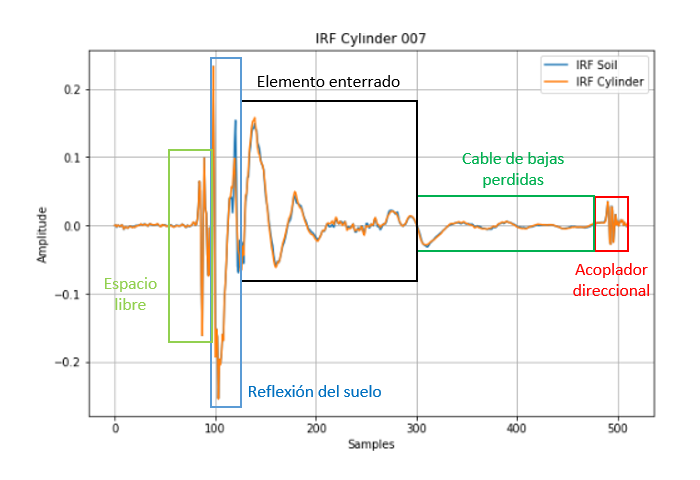

Figura 5. Caracterización sobre IRF

También se puede apreciar que todos los IRFs mostrados el las graficas anteriores tienen un comportamiento similar el cual vamos analizar al detalle (figura 5). Primero se presentan las perturbaciones de la onda electromagnética retro-dispersada por el elemento enterrado, luego se se encuentran las reflexiones sobre la superficie del suelo, posterior a esto se aprecia el comportamiento de la onda electromagnética viajando en el espacio libre junto con las reflexiones internas de la antena, y por ultimo se observan los efectos del cable y del acoplador direccional.





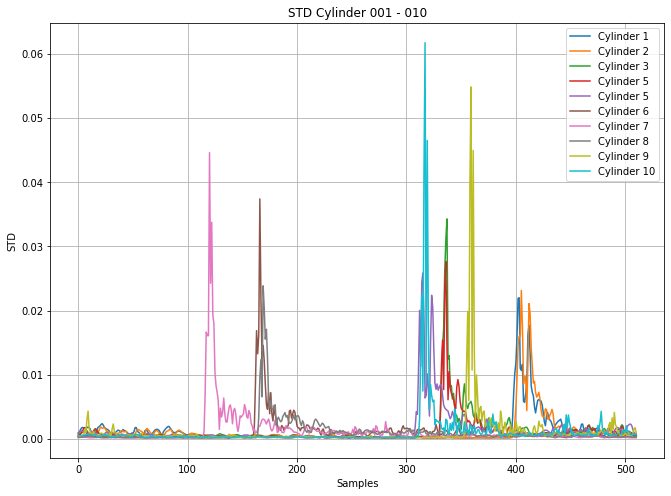

std max Cilindro 1: 0.022016644199662955
std max Cilindro 2: 0.023152125211485068
std max Cilindro 3: 0.03430413162784431
std max Cilindro 4: 0.027670761575532284
std max Cilindro 5: 0.0258768586002817
std max Cilindro 6: 0.037424996806961014
std max Cilindro 7: 0.044627056076911385
std max Cilindro 8: 0.023869781290600012
std max Cilindro 9: 0.0548775562120473
std max Cilindro 10: 0.06177348110948702


In [171]:
# Se efectua la desviacion estandar para los 500 IRFs de cada uno de los elementos canonicos 
dev_C1=np.std(H3_C1, axis=0)  # desviación estandar calculada entre los 500 IRFs de las 511 muestras
dev_C2=np.std(H3_C2, axis=0)
dev_C3=np.std(H3_C3, axis=0)
dev_C4=np.std(H3_C4, axis=0)
dev_C5=np.std(H3_C5, axis=0)
dev_C6=np.std(H3_C6, axis=0)
dev_C7=np.std(H3_C7, axis=0)
dev_C8=np.std(H3_C8, axis=0)
dev_C9=np.std(H3_C9, axis=0)
dev_C10=np.std(H3_C10, axis=0)

Max_C1=max(dev_C1)
Max_C2=max(dev_C2)
Max_C3=max(dev_C3)
Max_C4=max(dev_C4)
Max_C5=max(dev_C5)
Max_C6=max(dev_C6)
Max_C7=max(dev_C7)
Max_C8=max(dev_C8)
Max_C9=max(dev_C9)
Max_C10=max(dev_C10)

plt.figure(figsize=(11,8))
plt.plot(x,dev_C1, label='Cylinder 1') 
plt.plot(x,dev_C2, label='Cylinder 2')
plt.plot(x,dev_C3, label='Cylinder 3')
plt.plot(x,dev_C4, label='Cylinder 5')
plt.plot(x,dev_C5, label='Cylinder 5')
plt.plot(x,dev_C6, label='Cylinder 6')
plt.plot(x,dev_C7, label='Cylinder 7')
plt.plot(x,dev_C8, label='Cylinder 8')
plt.plot(x,dev_C9, label='Cylinder 9')
plt.plot(x,dev_C10, label='Cylinder 10')
plt.xlabel('Samples') 
plt.ylabel('STD')
plt.title('STD Cylinder 001 - 010') 
plt.legend()
plt.grid()
plt.show() 

print(f'std max Cilindro 1: {Max_C1}')
print(f'std max Cilindro 2: {Max_C2}')
print(f'std max Cilindro 3: {Max_C3}')
print(f'std max Cilindro 4: {Max_C4}')
print(f'std max Cilindro 5: {Max_C5}')
print(f'std max Cilindro 6: {Max_C6}')
print(f'std max Cilindro 7: {Max_C7}')
print(f'std max Cilindro 8: {Max_C8}')
print(f'std max Cilindro 9: {Max_C9}')
print(f'std max Cilindro 10: {Max_C10}')


Se realiza el calcula de la desviación estándar sobre los datos crudos para cada uno de los cilindros considerados en este estudio. De manera preliminar se puede determinar que en las zonas donde se encuentra el elemento enterrado (en relación con la caracterización realizada en la figura 5) hay una mayor variación de la desviación para los cilindros metálicos como se muestra en la grafica anterior. Pero sin duda es notoria que la desviación es mayor en la zona del IRF donde se encuentra la reflexión de la onda electromagnética con el suelo, obteniendo un máximo global para el cilindro 10 seguido del cilindro 9. Esto puede ser debido a la uniformidad del terreno y a la cantidad de agua absorbida la tierra en el momento de realizar las medidas.La desviación estándar se calculo entre los 500 IRFs de cada elemento 

## **3. Preparación de los datos**

Parte de preparación de los datos es extraer la información de interés de cada uno de los elementos canónicos de los archivos UWBdata.mat el cual se efectuó en el apartado anterior.Este proceso podría considerarse como la limpieza de datos.

Además, se realiza un preprocesamiento, transformación y selección de los datos con el propósito de analizarlos.



In [172]:
sh=H3_C1[0].argmax()
st=30
IRF_Ref=np.roll(H3_C1[0],511-sh+st) # calculo de IRF de referencia para hacer la correlacion

# se realiza la correlacion con el IRF de referencia y el IRF de la medida sobre el elemento enterrado
H3_X_C1=np.correlate(IRF_Ref, H3_C1[249], mode='full') 
H3_X_C2=np.correlate(IRF_Ref, H3_C2[249], mode='full') 
H3_X_C3=np.correlate(IRF_Ref, H3_C3[249], mode='full') 
H3_X_C4=np.correlate(IRF_Ref, H3_C4[249], mode='full') 
H3_X_C5=np.correlate(IRF_Ref, H3_C5[249], mode='full') 
H3_X_C6=np.correlate(IRF_Ref, H3_C6[249], mode='full') 
H3_X_C7=np.correlate(IRF_Ref, H3_C7[249], mode='full') 
H3_X_C8=np.correlate(IRF_Ref, H3_C8[249], mode='full') 
H3_X_C9=np.correlate(IRF_Ref, H3_C9[249], mode='full') 
H3_X_C10=np.correlate(IRF_Ref, H3_C10[249], mode='full') 

# se realiza el desplazamiendo de los IRF de cada elemnto
shift_C1=H3_X_C1.argmax()-510
shift_C2=H3_X_C2.argmax()-510
shift_C3=H3_X_C3.argmax()-510
shift_C4=H3_X_C4.argmax()-510
shift_C5=H3_X_C5.argmax()-510
shift_C6=H3_X_C6.argmax()-510
shift_C7=H3_X_C7.argmax()-510
shift_C8=H3_X_C8.argmax()-510
shift_C9=H3_X_C9.argmax()-510
shift_C10=H3_X_C10.argmax()-510

H3_C1_St=np.roll(H3_C1,shift_C1)
H3_C2_St=np.roll(H3_C2,shift_C2)
H3_C3_St=np.roll(H3_C3,shift_C3)
H3_C4_St=np.roll(H3_C4,shift_C4)
H3_C5_St=np.roll(H3_C5,shift_C5)
H3_C6_St=np.roll(H3_C6,shift_C6)
H3_C7_St=np.roll(H3_C7,shift_C7)
H3_C8_St=np.roll(H3_C8,shift_C8)
H3_C9_St=np.roll(H3_C9,shift_C9)
H3_C10_St=np.roll(H3_C10,shift_C10)


Se realiza un desplazamiento de todos los IRF y se seleccionan aquellos que contiene información del elemento canónico enterrado, con el propósito de hacer un análisis estadístico de estos datos.

## **4. Analisis y visualización**

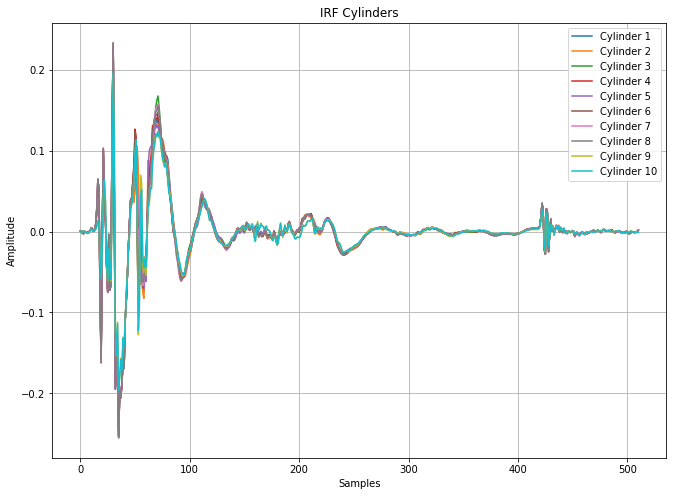

In [173]:
plt.figure(figsize=(11,8))
plt.plot(x,H3_C1_St[249], label='Cylinder 1')
plt.plot(x,H3_C2_St[249], label='Cylinder 2') 
plt.plot(x,H3_C3_St[249], label='Cylinder 3')  
plt.plot(x,H3_C4_St[249], label='Cylinder 4') 
plt.plot(x,H3_C5_St[249], label='Cylinder 5') 
plt.plot(x,H3_C6_St[249], label='Cylinder 6') 
plt.plot(x,H3_C7_St[249], label='Cylinder 7') 
plt.plot(x,H3_C8_St[249], label='Cylinder 8') 
plt.plot(x,H3_C9_St[249], label='Cylinder 9') 
plt.plot(x,H3_C10_St[249], label='Cylinder 10') 
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinders') 
plt.legend()
plt.grid()
plt.show() 

Al realizar la sincronización de todos los IRF de los elementos canonicos, se puede apreciar que tienen un comportamiento similar a lo largo de las 511 muestras

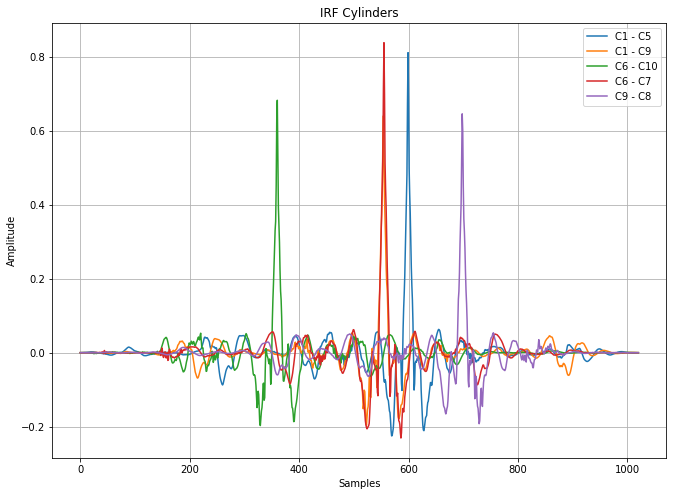

 max correlacion C1-C5: 0.8117953775524126
 max correlacion C1-C9: 0.6409800983110553
 max correlacion C6-C10: 0.6829807690031542
 max correlacion C6-C7: 0.838766148694446
 max correlacion C9-C8: 0.6462447345545274


In [186]:
Corr_C1_C5=np.correlate(H3_C1[249], H3_C5[249], mode='full') # correlacion entre el cilindro 1 y 5
Corr_C1_C9=np.correlate(H3_C1[249], H3_C9[249], mode='full') # correlacion entre el cilindro 1 y 9
Corr_C6_C10=np.correlate(H3_C6[249], H3_C10[249], mode='full') # correlacion entre el cilindro 6 y 10
Corr_C6_C7=np.correlate(H3_C6[249], H3_C7[249], mode='full') # correlacion entre el cilindro 6 y 7
Corr_C9_C8=np.correlate(H3_C9[249], H3_C8[249], mode='full') # correlacion entre el cilindro 9 y 8

xa = np.arange(0,1021,1)
plt.figure(figsize=(11,8))
plt.plot(xa,Corr_C1_C5, label='C1 - C5')
plt.plot(xa,Corr_C1_C9, label='C1 - C9')
plt.plot(xa,Corr_C6_C10, label='C6 - C10')
plt.plot(xa,Corr_C6_C7, label='C6 - C7')
plt.plot(xa,Corr_C9_C8, label='C9 - C8')
plt.xlabel('Samples') 
plt.ylabel('Amplitude')
plt.title('IRF Cylinders') 
plt.legend()
plt.grid()
plt.show() 

Max_1=max(Corr_C1_C5)
Max_2=max(Corr_C1_C9)
Max_3=max(Corr_C6_C10)
Max_4=max(Corr_C6_C7)
Max_5=max(Corr_C9_C8)

print(f' max correlacion C1-C5: {Max_1}')
print(f' max correlacion C1-C9: {Max_2}')
print(f' max correlacion C6-C10: {Max_3}')
print(f' max correlacion C6-C7: {Max_4}')
print(f' max correlacion C9-C8: {Max_5}')


Con el propósito de determinar relaciones entre los elementos canónicos se realizó la correlación entre los IRF centrales (lugar donde se encuentra el elemento enterrado). Como lo muestra la gráfica anterior la correlación entre el cilindro 6 y 7 es mayor seguida de la correlación entre el cilindro 1 y 5, esto se debe a que son cilindros del mismo material por ende con la misma permitividad. Mientras, que la correlación entre elementos con diferentes permitividades es mas baja, como lo muestra la curva verde, violeta y naranja.

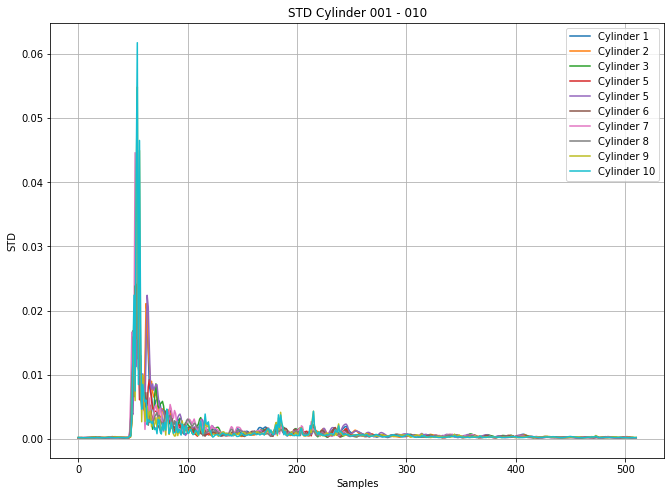

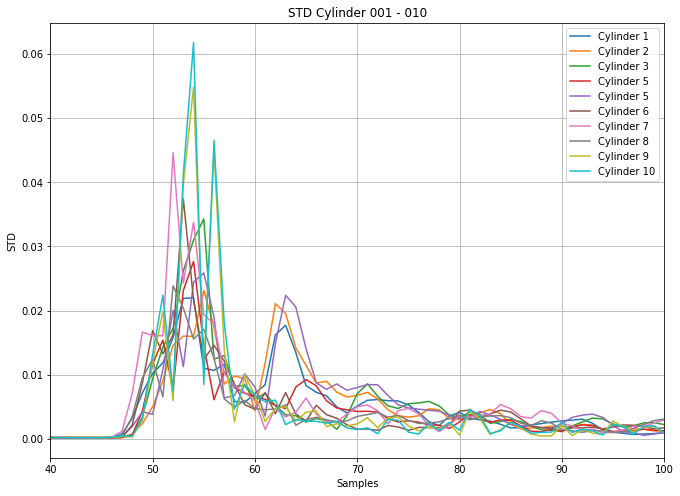

In [190]:
dev_C1_St=np.std(H3_C1_St, axis=0)  # desviación estandar calculada entre los 500 IRFs de las 511 muestras
dev_C2_St=np.std(H3_C2_St, axis=0)
dev_C3_St=np.std(H3_C3_St, axis=0)
dev_C4_St=np.std(H3_C4_St, axis=0)
dev_C5_St=np.std(H3_C5_St, axis=0)
dev_C6_St=np.std(H3_C6_St, axis=0)
dev_C7_St=np.std(H3_C7_St, axis=0)
dev_C8_St=np.std(H3_C8_St, axis=0)
dev_C9_St=np.std(H3_C9_St, axis=0)
dev_C10_St=np.std(H3_C10_St, axis=0)

plt.figure(figsize=(11,8))
plt.plot(x,dev_C1_St, label='Cylinder 1') 
plt.plot(x,dev_C2_St, label='Cylinder 2')
plt.plot(x,dev_C3_St, label='Cylinder 3')
plt.plot(x,dev_C4_St, label='Cylinder 5')
plt.plot(x,dev_C5_St, label='Cylinder 5')
plt.plot(x,dev_C6_St, label='Cylinder 6')
plt.plot(x,dev_C7_St, label='Cylinder 7')
plt.plot(x,dev_C8_St, label='Cylinder 8')
plt.plot(x,dev_C9_St, label='Cylinder 9')
plt.plot(x,dev_C10_St, label='Cylinder 10')
plt.xlabel('Samples') 
plt.ylabel('STD')
plt.title('STD Cylinder 001 - 010') 
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(11,8))
plt.plot(x,dev_C1_St, label='Cylinder 1') 
plt.plot(x,dev_C2_St, label='Cylinder 2')
plt.plot(x,dev_C3_St, label='Cylinder 3')
plt.plot(x,dev_C4_St, label='Cylinder 5')
plt.plot(x,dev_C5_St, label='Cylinder 5')
plt.plot(x,dev_C6_St, label='Cylinder 6')
plt.plot(x,dev_C7_St, label='Cylinder 7')
plt.plot(x,dev_C8_St, label='Cylinder 8')
plt.plot(x,dev_C9_St, label='Cylinder 9')
plt.plot(x,dev_C10_St, label='Cylinder 10')
plt.xlabel('Samples') 
plt.ylabel('STD')
plt.title('STD Cylinder 001 - 010') 
plt.xlim(40,100)
plt.legend()
plt.grid()
plt.show() 

Como se menciono anteriormente la zona donde se encuentra enterrado el elemento ( 60 – 80 muestras) presenta una mayor variación de la deviación estándar para los 5 cilindros metálicos, lo que representa en una mayor reflexión de la onda electromagnética.

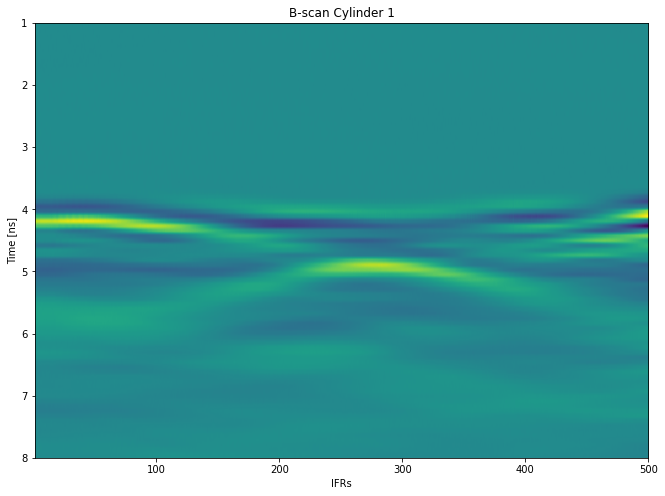

In [200]:
H3_C1_mean = np.mean(H3_C1_St, axis=0)
H3_C1_F=(H3_C1_St-H3_C1_mean).T

plt.figure(figsize=(11,8))
plt.imshow(H3_C1_F, extent=[1, 500, 40, 0], aspect='auto')
plt.ylim(8, 1)  # make zoom axis "y" time ns
plt.title('B-scan Cylinder 1')
plt.xlabel('IFRs')
plt.ylabel('Time [ns]')

plt.subplots_adjust(hspace=0.275)
plt.show()

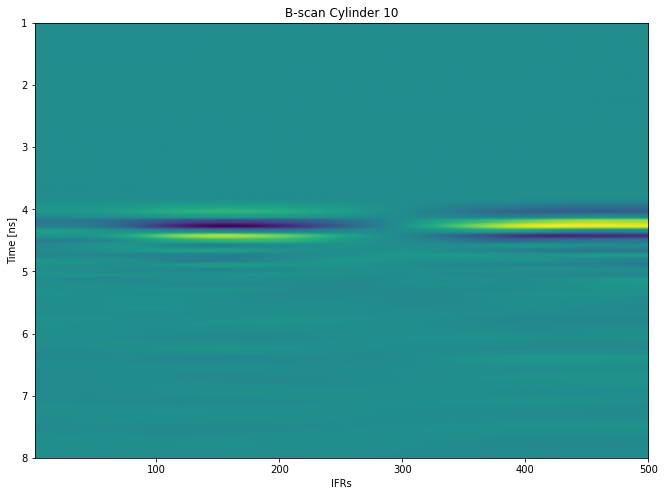

In [201]:
H3_C10_mean = np.mean(H3_C10_St, axis=0)
H3_C10_F=(H3_C10_St-H3_C10_mean).T

plt.figure(figsize=(11,8))
plt.imshow(H3_C10_F, extent=[1, 500, 40, 0], aspect='auto')
plt.ylim(8, 1)  # make zoom axis "y" time ns
plt.title('B-scan Cylinder 10')
plt.xlabel('IFRs')
plt.ylabel('Time [ns]')

plt.subplots_adjust(hspace=0.275)
plt.show()

Por ultimo se grafica los radargramas o B-scan paro los cilindros 1 y 10, donde se puede apreciar la firma hiperbólica para el cilindro 1, mientras que para el cilindro 10 es difícil apreciar este comportamiento.

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*